# #PraTodosVerem - Anotação de Imagens com Categoria

Autor: Fabio Beranizo Fontes Lopes<br>
Email: fabio.beranizo@gmail.com

> Neste notebook propomos um processo para anotar as imagens com uma das 4 categorias propostas anteriormente (Foto; Arte; Heterogêneo).
> Uma vez anotados, podemos selecionar imagens de grupos e experimentar alguns baselines.

## Aprendizados

[TODO]

---

**Próximos passos:**

- TODO

## Feature Extraction c/ ResNet50 + K-Means

In [62]:
import numpy as np
import tensorflow as tf
from IPython.display import Image, display
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

### Resize images to 224x224x3

In [53]:
image_size = (224, 224)
input_shape = (*image_size, 3)
batch_size = 50

train_ds = tf.keras.utils.image_dataset_from_directory(
    "../data/raw/posts/",
    seed=0,
    image_size=image_size,
    batch_size=batch_size,
    label_mode="categorical",
    labels="inferred",
    shuffle=False)

Found 861 files belonging to 206 classes.


In [44]:
resnet = tf.keras.applications.ResNet50(weights="imagenet", include_top=False, input_shape=input_shape)

In [45]:
feature_extractor_model = tf.keras.Sequential([
    resnet,
    tf.keras.layers.GlobalAveragePooling2D()
])

X = feature_extractor_model.predict(train_ds)

18/18 [==============================] - 48s 2s/step


In [15]:
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [21]:
n_clusters = 4
kmeans = KMeans(n_clusters)
label = kmeans.fit_predict(X)

In [70]:
import pandas as pd
import plotly.express as px

df = pd.DataFrame({"x": X[:,0], "y": X[:,1], "color": label.astype(str), "filenames": train_ds.file_paths})

fig = px.scatter(df, x="x", y="y", color="color", hover_data=["filenames"])
fig.show()

## Resultados

In [99]:
import collections

counter = collections.Counter(label)
counter

Counter({1: 130, 2: 230, 3: 306, 0: 195})

In [92]:
n_images = 5

### Grupo 0

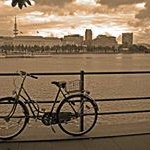

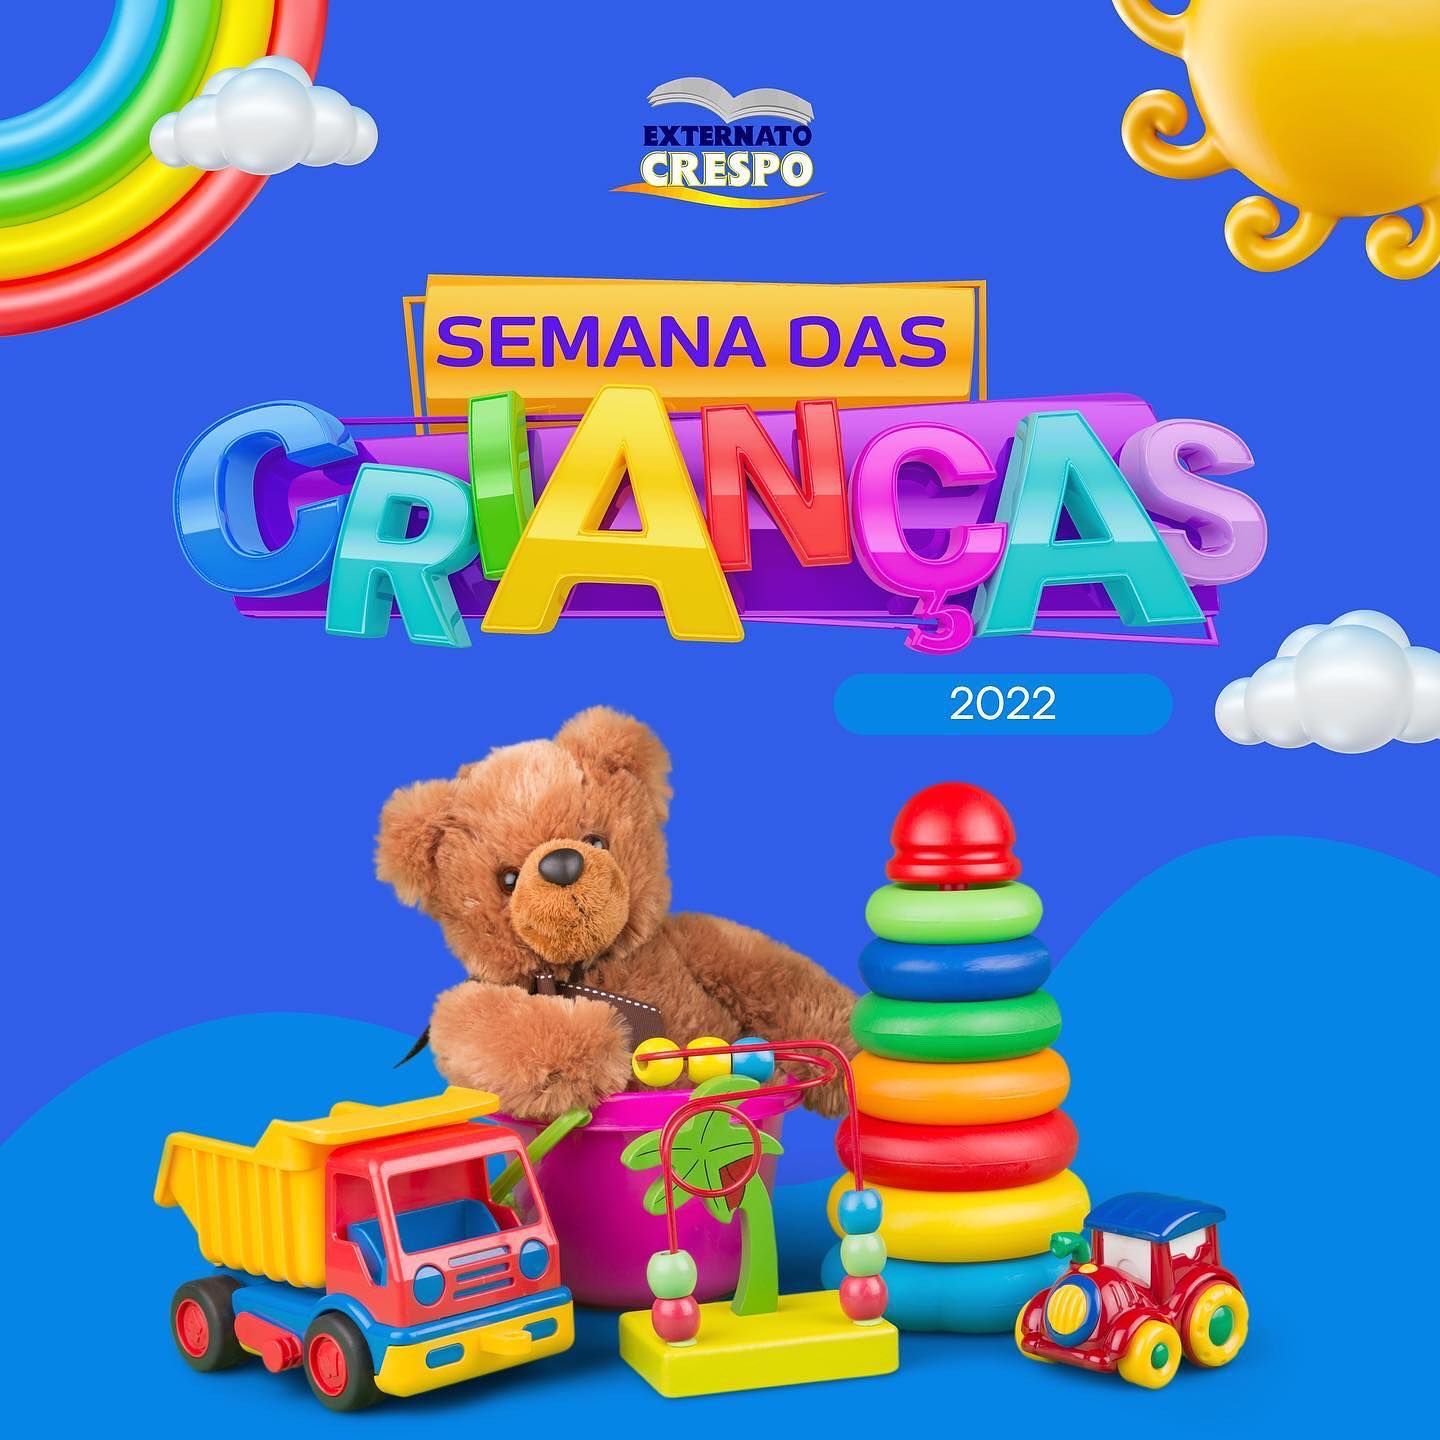

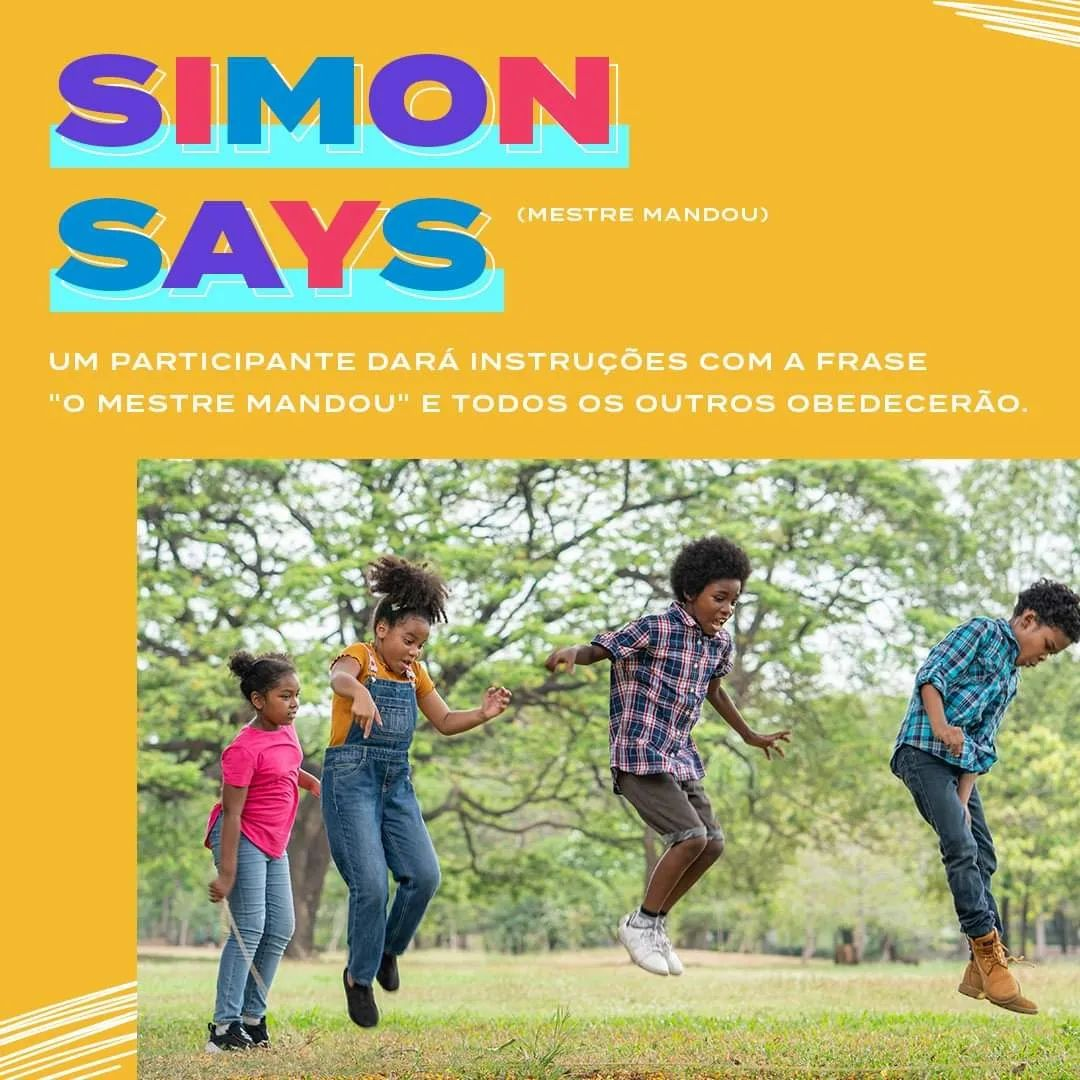

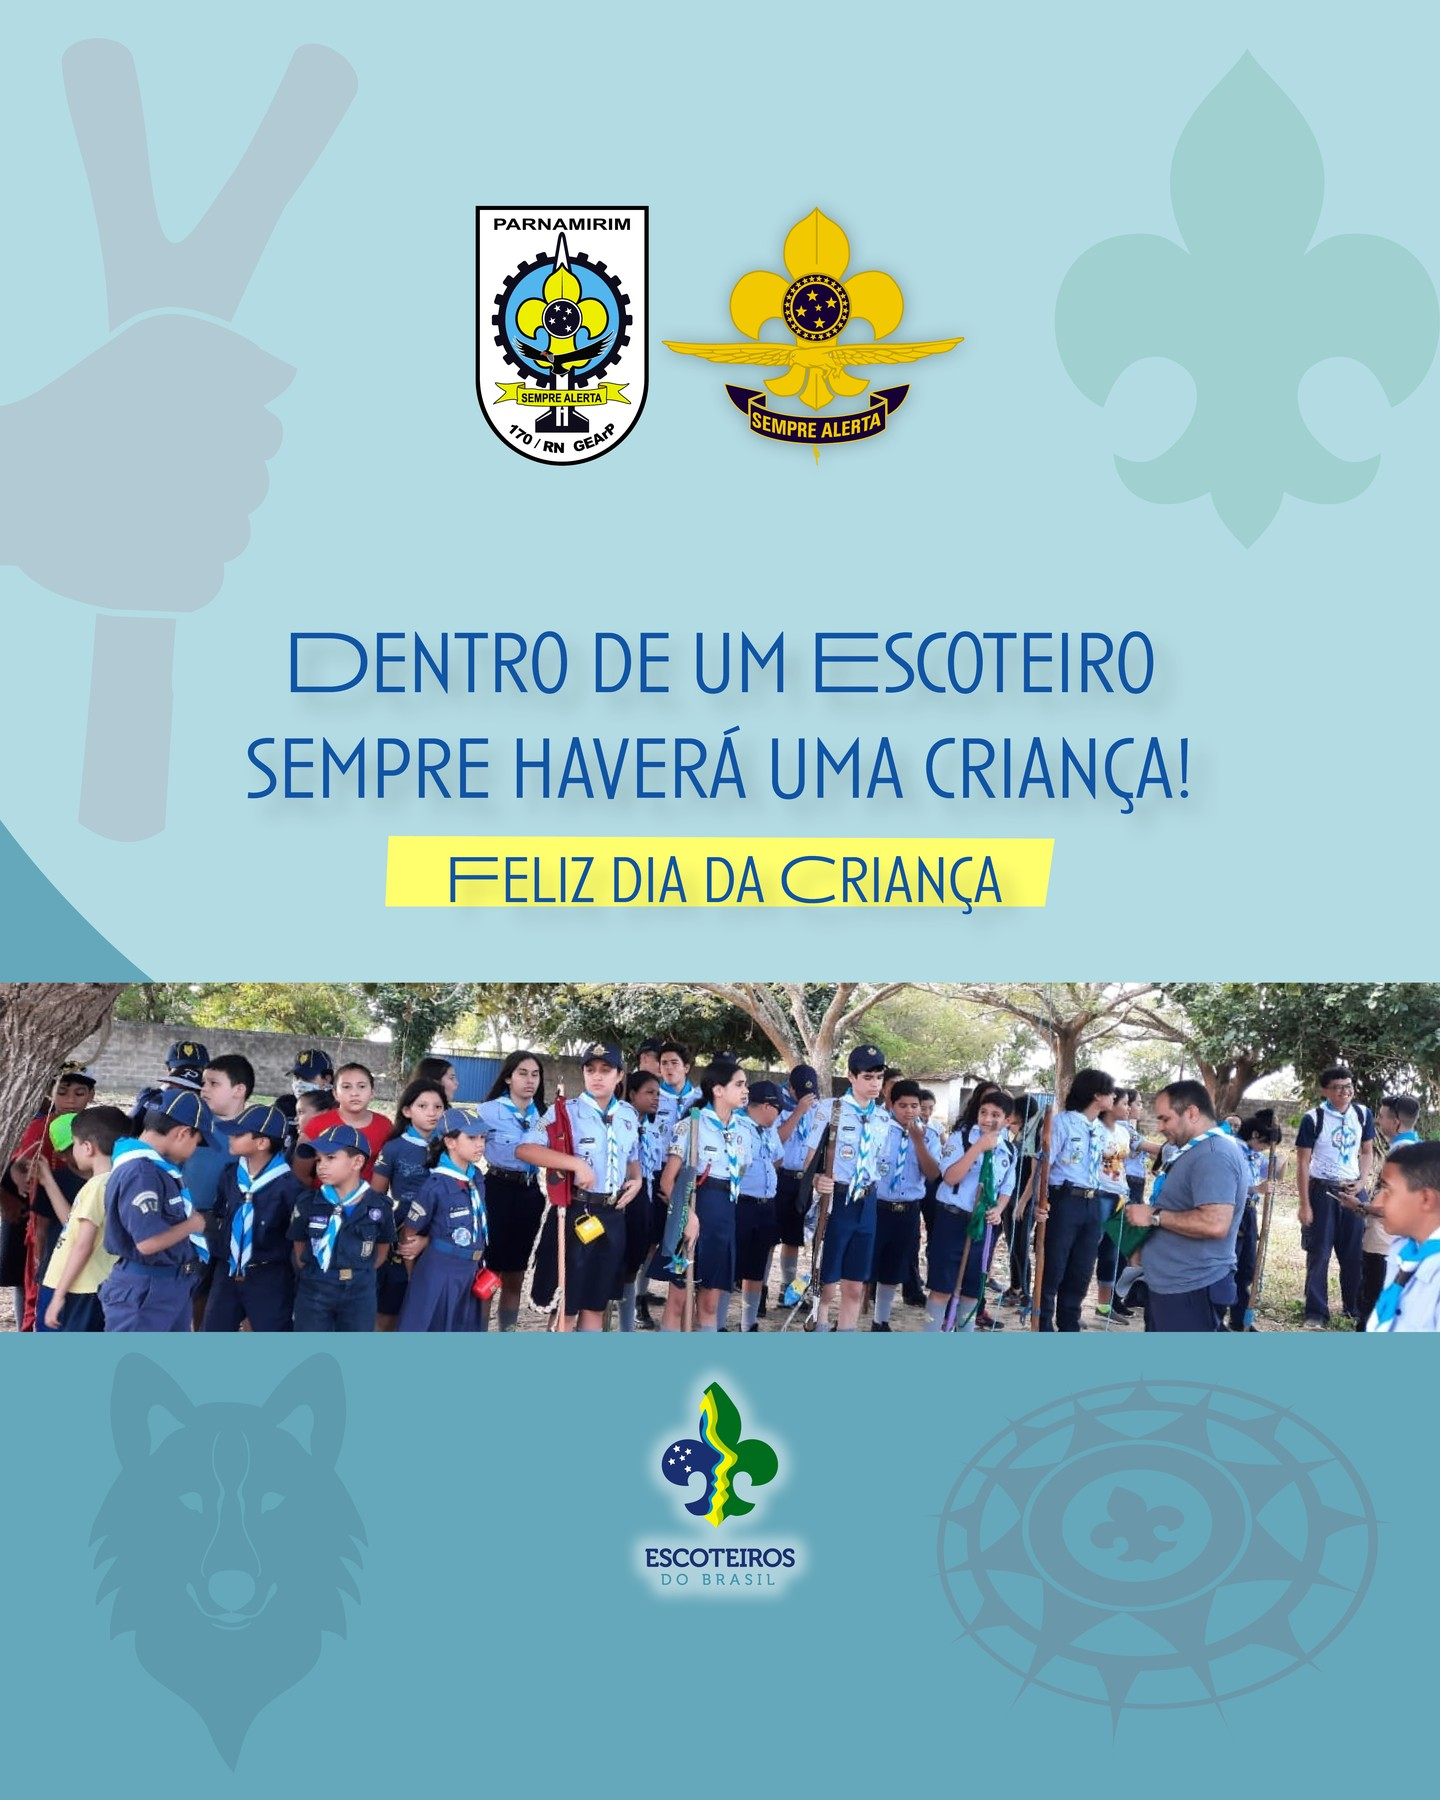

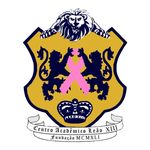

In [100]:
group = "0"
images = [Image(filename=image_path) for image_path in df.loc[df["color"]==group, "filenames"].sample(n_images, random_state=0)]
display(*images)

### Grupo 1

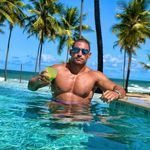

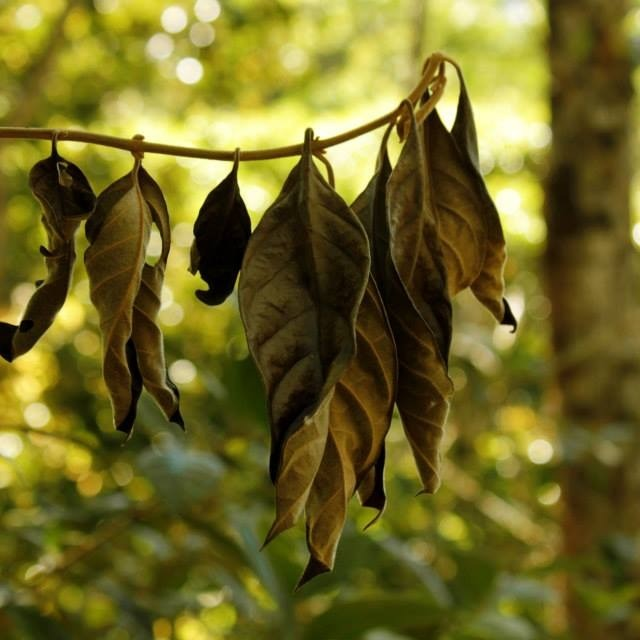

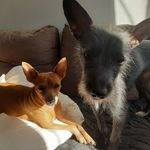

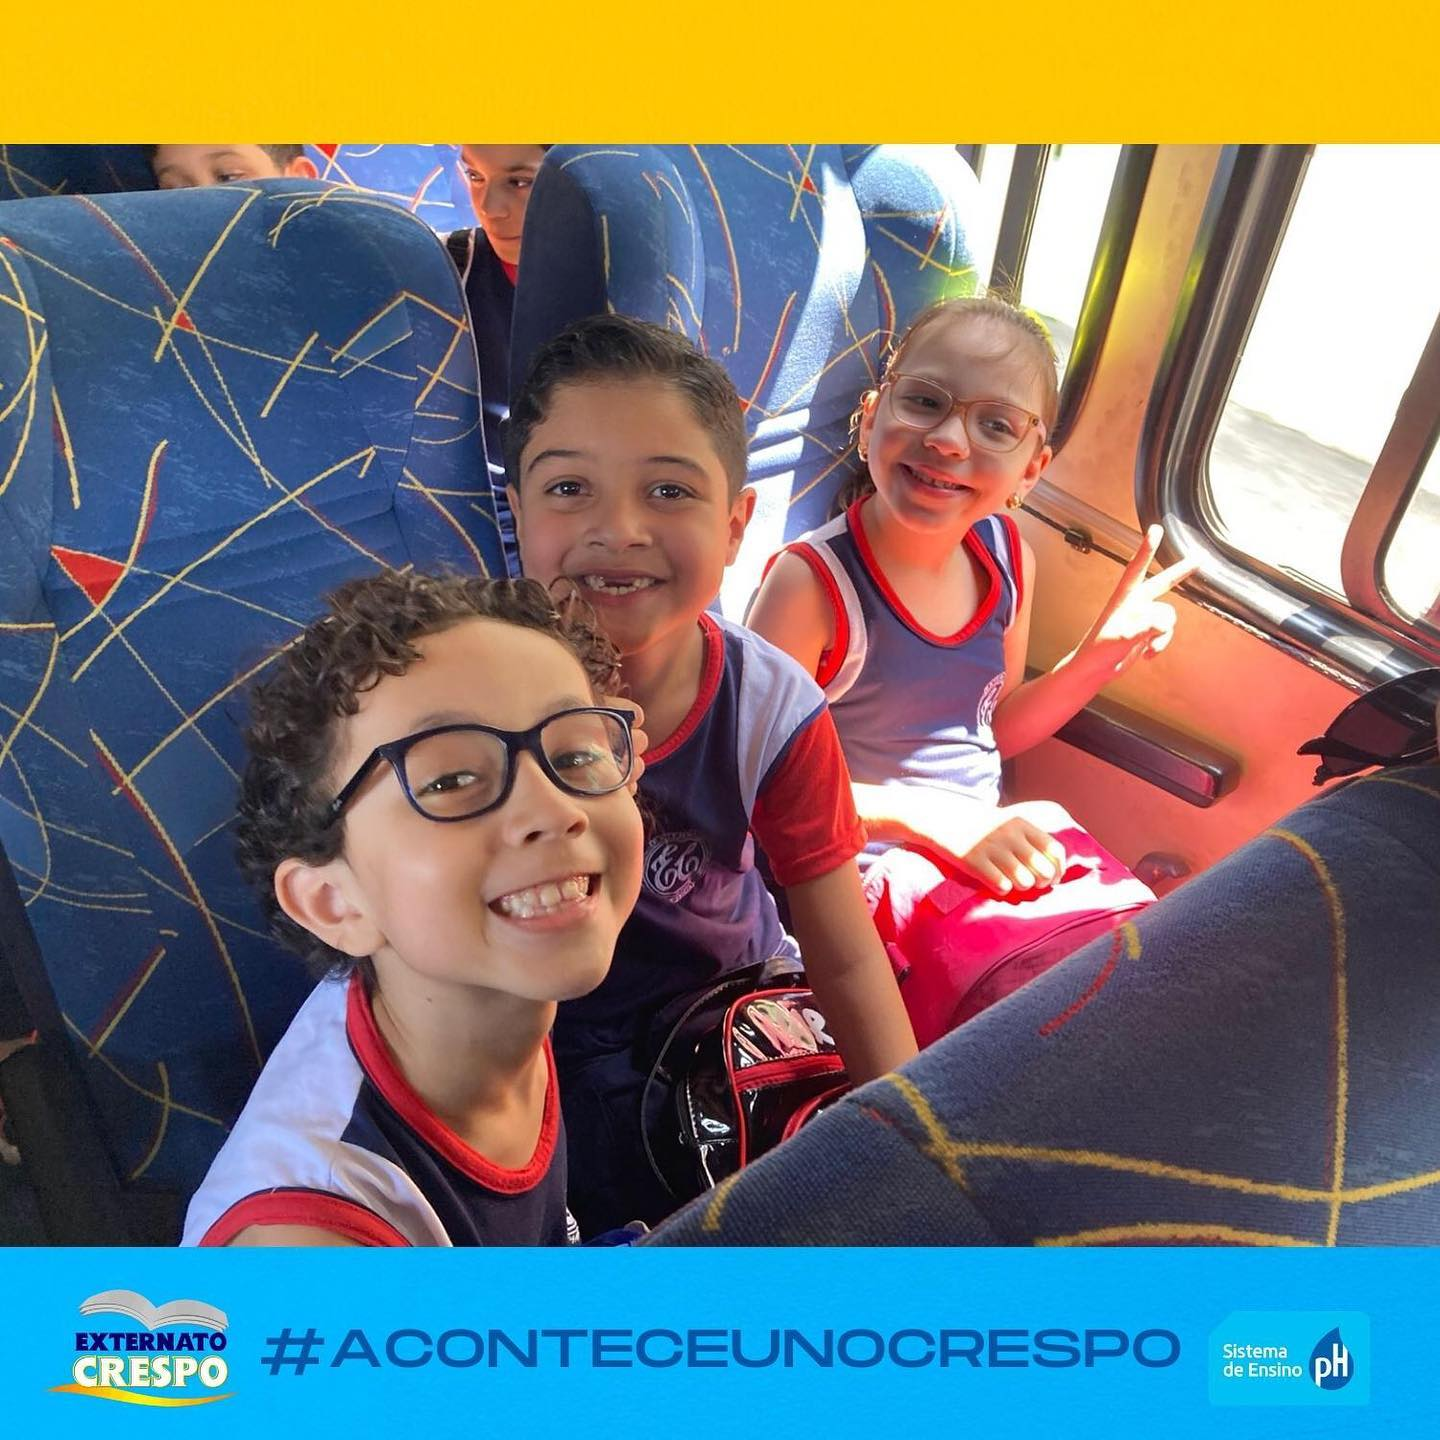

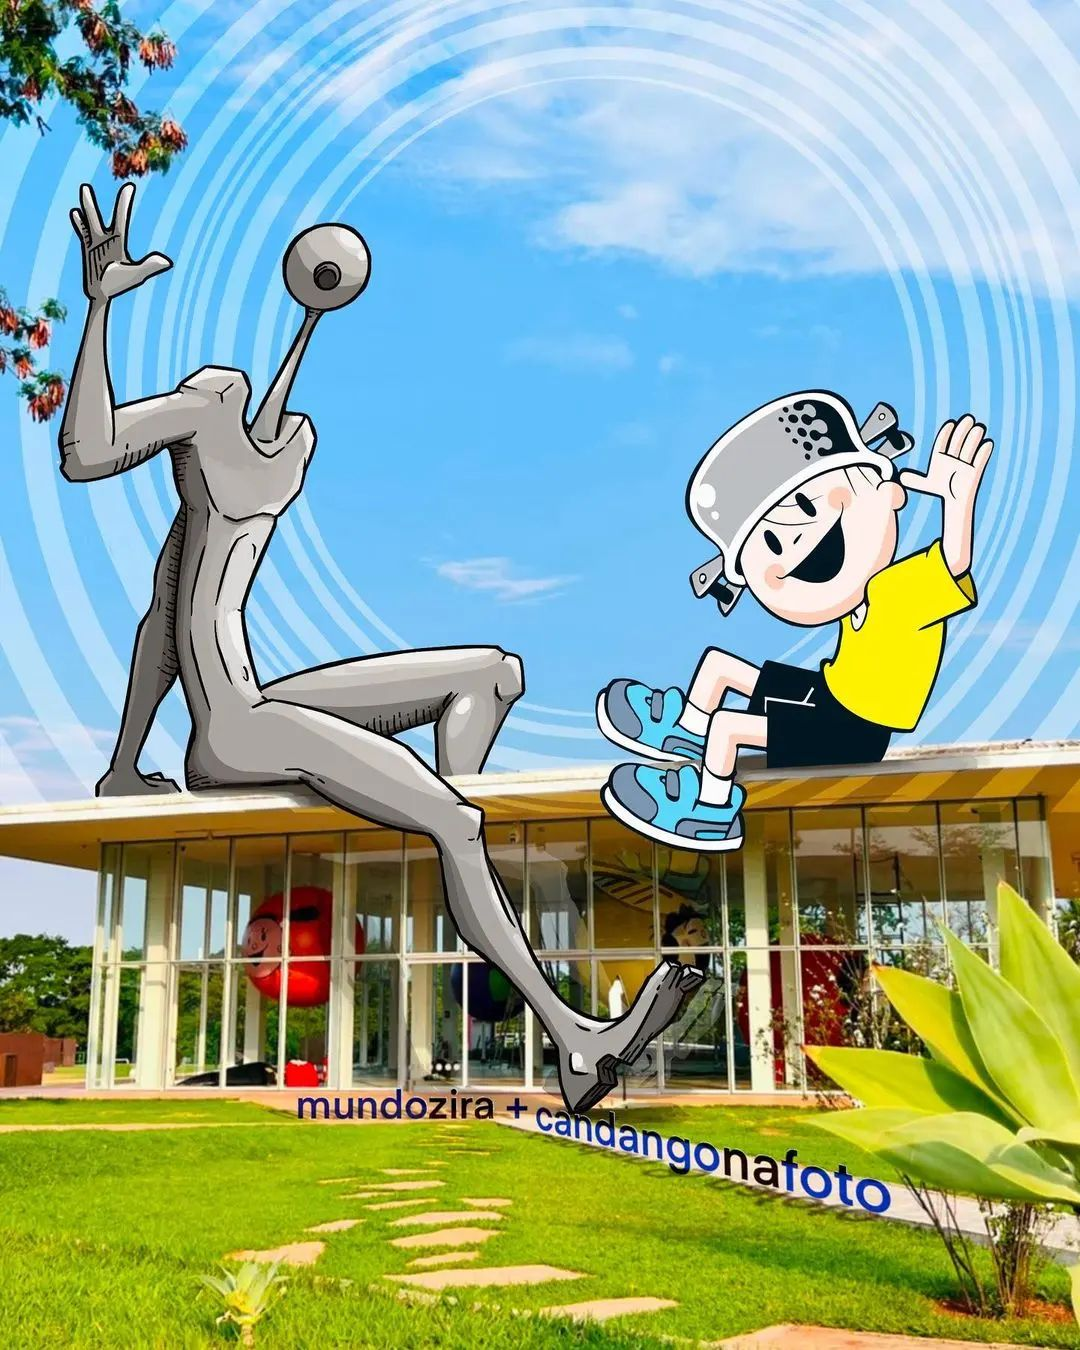

In [101]:
group = "1"
images = [Image(filename=image_path) for image_path in df.loc[df["color"]==group, "filenames"].sample(n_images, random_state=0)]
display(*images)

## Grupo 2

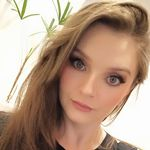

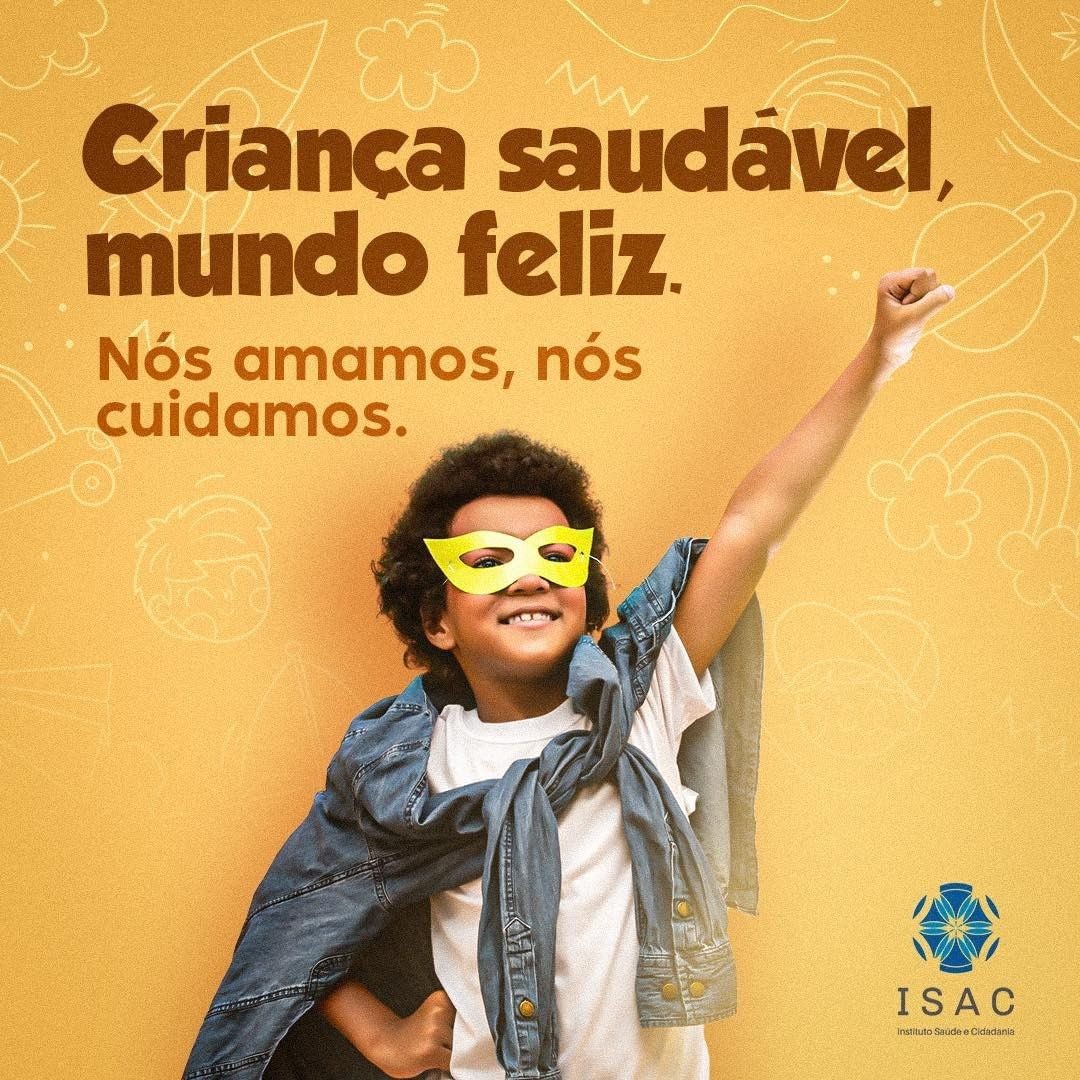

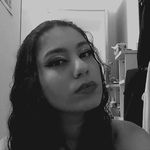

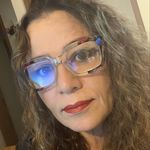

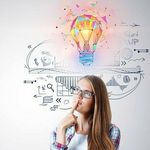

In [102]:
group = "2"
images = [Image(filename=image_path) for image_path in df.loc[df["color"]==group, "filenames"].sample(n_images, random_state=0)]
display(*images)

## Grupo 3

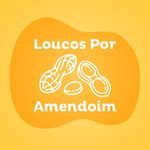

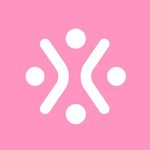

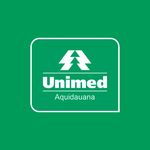

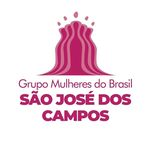

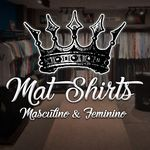

In [103]:
group = "3"
images = [Image(filename=image_path) for image_path in df.loc[df["color"]==group, "filenames"].sample(n_images, random_state=0)]
display(*images)